# Predicting One Year Survival of Patients with Hepatocellular Carcinoma: 
# A Logistic Regression Model

### <img src="images/liver_2.png" width="600">


## Contents:

- [Background Information](#Background-Information)
- [Goal](#Goal)
- [Data Summary](#Data-Summary)
- [Libraries to Import](#Libraries-to-Import)
- [Data Exploration](#Data-Exploration)
- [Pandas Profiling Package](#Pandas-Profiling-Package)
- [Feature Engineering and Model Preparation](#Feature-Engineering-and-Model-Preparation)
- [Logistic Model](#Logistic-Model)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- [References](#References)


## Background Information


One out of every six deaths that occur in the world are due to cancer.  Cancer is second only to cardiovascular disease in all-cause mortality globally. Liver cancer (hepatocellular carcinoma) is consistently ranked as one of the most common forms of cancer and is one of the most lethal (Figure 1), with a 5-year survival rate of about 15% in the USA (Figure 2).  The majority of liver cancer cases are detected at advanced stages of disease, when treatment options are severely limited in both quantity and effectiveness.  With this in mind, more effective screening and earlier cancer detection has the most potential to save lives and reduce disease cost burden. A better understanding of hepatocellular carcinoma and its risk factors is necessary for more effective screening, early recognition, and optimal treatment.

Figure 1
### <img src="images/cancer_death_by_type.png" width="800">


Figure 2
### <img src="images/five_year_survival_rate_liver_cancer.png" width="800">


 ## Goal

The purpose of this model, in predicting whether a patient diagnosed with hepatocellular carcinoma will survive past one year in conjunction with established guidelines, is to reduce mortality rate secondary to hepatocellular carcinoma.

This model would prove most useful to clinicians, patients, and policy makers alike—as they grapple with the cancer decision making process and potential treatment options.  Ideally, machine learning and statistical models will find a place in depicting a completer and more holistic patient profile. 



## Data Summary
This hepatocellular carcinoma dataset consists of patient-data from 165 former patients of Hospital and University Centre of Coimbra (Portugal). The dataset contains 49 features selected according to the EASL-EORTC (European Association for the Study of the Liver - European Organization for Research and Treatment of Cancer) Clinical Practice Guidelines.  The target variable, "Class", is the survival of each patient at 1 year and is represented as 0 (deceased) and 1 (alive).

## Libraries to Import


In [ ]:
!pip install fancyimpute

In [ ]:
!pip install imblearn


In [23]:
#import functions from .py file
from notebook_functions import *

In [1]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
from scipy import stats
import statsmodels as sm
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report, r2_score, make_scorer, roc_curve, auc
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, StratifiedKFold, KFold, cross_val_predict


%matplotlib inline

Using TensorFlow backend.


## Data Exploration


In [2]:
###preview data
raw_hcc_data=pd.read_csv("hcc_data.csv")
raw_hcc_data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1


- ### Binarizing gender (male/female)

In [3]:
## create dummy variables for gender
raw_hcc_data = pd.concat([raw_hcc_data,pd.get_dummies(raw_hcc_data['Gender'], prefix='male',dummy_na=False)],axis=1).drop(['Gender'],axis=1)

In [4]:
raw_hcc_data.head()

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,...,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,male_0,male_1
0,0,1,0,0,0,0,1,0,1,1,...,0.7,1,3.5,0.5,?,?,?,1,0,1
1,?,0,0,0,0,1,1,?,?,1,...,?,1,1.8,?,?,?,?,1,1,0
2,0,1,1,0,1,0,1,0,1,0,...,2.1,5,13,0.1,28,6,16,1,0,1
3,1,1,0,0,0,0,1,0,1,1,...,1.11,2,15.7,0.2,?,?,?,0,0,1
4,1,1,1,0,1,0,1,0,1,0,...,1.8,1,9,?,59,15,22,1,0,1


In [5]:
#examine dataset shape
raw_hcc_data.shape


(165, 51)

In [6]:
# replace all "?" in the dataset with 0
zeroed_hcc_data=raw_hcc_data.replace("?", 0)

In [7]:
zeroed_hcc_data.head()

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,...,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,male_0,male_1
0,0,1,0,0,0,0,1,0,1,1,...,0.7,1,3.5,0.5,0,0,0,1,0,1
1,0,0,0,0,0,1,1,0,0,1,...,0,1,1.8,0,0,0,0,1,1,0
2,0,1,1,0,1,0,1,0,1,0,...,2.1,5,13,0.1,28,6,16,1,0,1
3,1,1,0,0,0,0,1,0,1,1,...,1.11,2,15.7,0.2,0,0,0,0,0,1
4,1,1,1,0,1,0,1,0,1,0,...,1.8,1,9,0,59,15,22,1,0,1


In [8]:
##checking to make sure there are no remaining Nan's/Null values
zeroed_hcc_data.isnull().sum().head()

Symptoms    0
Alcohol     0
HBsAg       0
HBeAg       0
HBcAb       0
dtype: int64

In [9]:
#examine all features in dataset
#49 original features
zeroed_hcc_data.count()

Symptoms          165
Alcohol           165
HBsAg             165
HBeAg             165
HBcAb             165
HCVAb             165
Cirrhosis         165
Endemic           165
Smoking           165
Diabetes          165
Obesity           165
Hemochro          165
AHT               165
CRI               165
HIV               165
NASH              165
Varices           165
Spleno            165
PHT               165
PVT               165
Metastasis        165
Hallmark          165
Age               165
Grams_day         165
Packs_year        165
PS                165
Encephalopathy    165
Ascites           165
INR               165
AFP               165
Hemoglobin        165
MCV               165
Leucocytes        165
Platelets         165
Albumin           165
Total_Bil         165
ALT               165
AST               165
GGT               165
ALP               165
TP                165
Creatinine        165
Nodule            165
Major_Dim         165
Dir_Bil           165
Iron      

- ### Examining Distribution of Target Class: Alive or Dead at 1 Year 

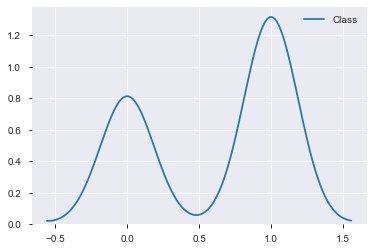

In [10]:
"""Note degree of class imbalance; 
Class Distribution: 2 classes: 63 patients labeled as “dies” (0) 102 patients labeled as “lives” (1)"""
sns.kdeplot(raw_hcc_data["Class"])

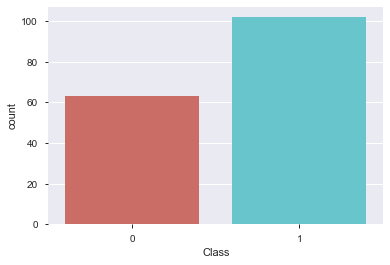

In [11]:
##target class distribution
sns.countplot(x='Class',data=raw_hcc_data, palette='hls')
plt.show()


- ### Correlation matrix

In [26]:
# Basic correlogram demonstrates minimal correlation among the dataset features
# Note: Must run all cells under the "Utilizing KNN imputed data for missing values" section cells prior to this cell for updated data 
corr = hcc_data_filled.corr()
corr.style.background_gradient(cmap='coolwarm')

**Summmary of 49 features:**

Gender                       (1=Male;0=Female)	

Symptoms                     (1=Yes;0=No)

Alcohol	                     (1=Yes;0=No)

Hepatitis B Surface Antigen	 (1=Yes;0=No)

Hepatitis B e Antigen        (1=Yes;0=No)

Hepatitis B Core Antibody    (1=Yes;0=No)

Hepatitis C Virus Antibody	 (1=Yes;0=No)

Cirrhosis                    (1=Yes;0=No)

Endemic Countries	         (1=Yes;0=No)

Smoking                      (1=Yes;0=No)

Diabetes	                 (1=Yes;0=No)

Obesity                      (1=Yes;0=No)

Hemochromatosis              (1=Yes;0=No)

Arterial Hypertension        (1=Yes;0=No)

Chronic Renal Insufficiency	 (1=Yes;0=No)

Human Immunodeficiency Virus (1=Yes;0=No)

Nonalcoholic Steatohepatitis	(1=Yes;0=No)

Esophageal Varices				(1=Yes;0=No)

Splenomegaly					(1=Yes;0=No)

Portal Hypertension			    (1=Yes;0=No)	

Portal Vein Thrombosis			(1=Yes;0=No)	

Liver Metastasis				(1=Yes;0=No)	

Radiological Hallmark			(1=Yes;0=No)	

Age at diagnosis				20-93				

Grams of Alcohol per day		Grams/day	

Packs of cigarets per year		Packs/year		

Performance Status*			    [0,1,2,3,4,5]	

Encephalopathy degree*			[1,2,3]			

Ascites degree*				    [1,2,3]			

International Normalised Ratio*	0.84-4.82		

Alpha-Fetoprotein (ng/mL)		AFP			

Haemoglobin (g/dL)				

Mean Corpuscular Volume	 (fl)	MCV

Leukocytes(G/L)					

Platelets	(G/L)				

Albumin (mg/dL)				

Total Bilirubin(mg/dL)			

Alanine transaminase (U/L)		ALT

Aspartate transaminase (U/L)	AST				

Gamma glutamyl transferase (U/L)GGT			

Alkaline phosphatase (U/L)		ALP				

Total Proteins (g/dL)			TP				

Creatinine (mg/dL)				

Number of Nodules				0-5			

Major dimension of nodule (cm)	

Direct Bilirubin (mg/dL)		

Iron	(mcg/dL)					

Oxygen Saturation (%)			

Ferritin (ng/mL)				

Class Attribute	


## Pandas Profiling Package


In [ ]:
# Must run all cells under the "Tuning Model" section cells prior to this cell for updated data 
hcc_data_filled.profile_report(style={'full_width':True})

## Feature Engineering and Model Preparation
   

- ### Creating MELD (Model for End-Stage Liver Disease) Score Feature
Created a MELD score for each patient in the dataset; MELD scores are use to predict 3 month mortality rates in patients with end-stage liver disease.  It stratifies severity of end-stage liver disease for transplant planning

MELD = [ 0.378 * loge(bilirubin)) + (1.120*loge(INR)) + (0.957*loge(creatinine)) + 0.643 ] * 10

The addition of the MELD score feature increased model accuracy by 2% (from 76% to 78%)
(see MELD score section under model tuning for detailed code)

<img src="images/meld_score.png" width="800">

In [25]:
"""Created a function to compute patient MELD scores and subsequently added a new column to hold these new values; 
MELD score formula uses Total Bili, INR, and Creatinine"""

hcc_data_filled['meld_score'] = hcc_data_filled.apply(lambda x: meld_score(x['Total_Bil'], x['INR'], x['Creatinine']), axis=1)
hcc_data_filled.tail()

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,...,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,male_0,male_1,meld_score,fib_score
160,0.0,1.0,0.000000,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0,...,3.0,0.334955,101.394976,49.032158,604.068064,1.0,1.0,0.0,-1.556233,0.001470
161,1.0,0.0,0.000105,0.0,0.000105,0.927103,1.0,0.0,0.0,0.0,...,2.2,2.300000,82.585391,25.974952,194.690392,0.0,1.0,0.0,11.052555,6.206492
162,0.0,1.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,1.0,1.0,...,18.6,19.841798,24.252124,9.569189,472.708991,1.0,0.0,1.0,9.489553,0.001206
163,0.0,1.0,1.000000,0.0,1.000000,1.000000,1.0,1.0,1.0,0.0,...,18.0,1.081644,53.276554,22.233510,388.664865,0.0,0.0,1.0,12.429722,0.003164
164,1.0,1.0,0.000000,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0,...,8.5,19.800000,27.781989,6.766036,163.463934,0.0,0.0,1.0,38.759910,0.001815


- ###  Creating Fibrosis-4 (FIB-4) Index for Liver Fibrosis Feature

Created a FIB-4 Index score for each patient.  It is a noninvasive estimate of liver scarring in HCV and HBV patients. (see Fibrosis-4 Index score section under model tuning for detailed code)

<img src="images/fib_4_index.png" width="400">

In [22]:
### Created a function to compute patient FIB-4 scores and subsequently added a new column to hold these new values
##Fib-4 score formula uses age, AST(Aspartate transaminase), Plt (platelet), ALT (Alanine transaminase)


hcc_data_filled['fib_score'] = hcc_data_filled.apply(lambda x: fib_score(x['Age'], x['AST'], x['Platelets'], x['ALT']), axis=1)
hcc_data_filled.tail()

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,...,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,male_0,male_1,meld_score,fib_score
160,0.0,1.0,0.000000,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0,...,3.0,0.334955,101.394976,49.032158,604.068064,1.0,1.0,0.0,-1.556233,0.001470
161,1.0,0.0,0.000105,0.0,0.000105,0.927103,1.0,0.0,0.0,0.0,...,2.2,2.300000,82.585391,25.974952,194.690392,0.0,1.0,0.0,11.052555,6.206492
162,0.0,1.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,1.0,1.0,...,18.6,19.841798,24.252124,9.569189,472.708991,1.0,0.0,1.0,9.489553,0.001206
163,0.0,1.0,1.000000,0.0,1.000000,1.000000,1.0,1.0,1.0,0.0,...,18.0,1.081644,53.276554,22.233510,388.664865,0.0,0.0,1.0,12.429722,0.003164
164,1.0,1.0,0.000000,0.0,0.000000,1.000000,1.0,0.0,1.0,0.0,...,8.5,19.800000,27.781989,6.766036,163.463934,0.0,0.0,1.0,38.759910,0.001815


- ### **Utilizing KNN imputed data for missing values**

-Nan's in dataset will be replaced with imputed data via KNN (K nearest neighbors) model; thereby preserving the "patient profile" and providing a more accurate result as oppose to simply filling in null values with means or averages.  

In [13]:
# replace all "?" in the dataset with Nan to prepare for KNN model
hcc_data=raw_hcc_data.replace("?", np.nan)
hcc_data.head()

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,...,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,male_0,male_1
0,0,1,0,0,0,0,1,0,1,1,...,0.7,1,3.5,0.5,NaN,NaN,NaN,1,0,1
1,NaN,0,0,0,0,1,1,NaN,NaN,1,...,NaN,1,1.8,NaN,NaN,NaN,NaN,1,1,0
2,0,1,1,0,1,0,1,0,1,0,...,2.1,5,13,0.1,28,6,16,1,0,1
3,1,1,0,0,0,0,1,0,1,1,...,1.11,2,15.7,0.2,NaN,NaN,NaN,0,0,1
4,1,1,1,0,1,0,1,0,1,0,...,1.8,1,9,NaN,59,15,22,1,0,1


In [14]:
###run KNN model using fancyimpute package
from fancyimpute import KNN

# Use 3 nearest rows which have a feature to fill in each row's missing features
# it returns a np.array which I store as a pandas dataframe
hcc_data_filled = pd.DataFrame(KNN(3).fit_transform(hcc_data))


Imputing row 1/165 with 4 missing, elapsed time: 0.014
Imputing row 101/165 with 6 missing, elapsed time: 0.021


In [15]:
##the column categories were removed when imputed into model, reinsert column headings
hcc_data_filled.columns = hcc_data.columns
hcc_data_filled.index = hcc_data.index

In [16]:
##All Nan's have been replaced with numerical values determined by KNN model
hcc_data_filled.head()

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,...,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,male_0,male_1
0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,...,0.700000,1.0,3.5,0.500000,172.615843,77.975160,679.936040,1.0,0.0,1.0
1,0.340541,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.342475,1.0,...,0.789121,1.0,1.8,0.650705,151.338876,54.818066,694.257321,1.0,1.0,0.0
2,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.0,...,2.100000,5.0,13.0,0.100000,28.000000,6.000000,16.000000,1.0,0.0,1.0
3,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,...,1.110000,2.0,15.7,0.200000,72.378636,26.112210,385.521860,0.0,0.0,1.0
4,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,0.0,...,1.800000,1.0,9.0,0.357381,59.000000,15.000000,22.000000,1.0,0.0,1.0


- ### Class balancing via SMOTE (Synthetic Minority Over-sampling Technique)
prior to SMOTE technique, X_train had 115 patient records, after SMOTE, X_train_res had 146 patient records

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X= hcc_data_filled.drop(["Class"], axis=1)
y = hcc_data_filled.Class


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

## Logistic Model 


- ### Base Model
Running a base logistic model in which Null values have been replaced with 0's and no additional model tuning or parameter optimization has occurred.

In [ ]:
X_scaled_zero = zeroed_hcc_data[zeroed_hcc_data.columns[:-1]]
y_zero = zeroed_hcc_data.Class



In [ ]:
# Split the data into a training set and a test set
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_scaled_zero, y_zero, random_state=0)

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train_0, y_train_0)
model_log

##run model with test data
y_hat_test_0 = logreg.predict(X_test_0)
y_hat_train_0 = logreg.predict(X_train_0)

In [ ]:
residuals = y_train_0 - y_hat_train_0
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

In [ ]:
residuals = y_test_0 - y_hat_test_0
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

In [ ]:
print('Training Precision: ', precision_score(y_hat_train_0, y_train_0))
print('Testing Precision: ', precision_score(y_hat_test_0, y_test_0))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train_0, y_train_0))
print('Testing Recall: ', recall_score(y_hat_test_0, y_test_0))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train_0, y_train_0))
print('Testing Accuracy: ', accuracy_score(y_hat_test_0, y_test_0))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train_0,y_train_0))
print('Testing F1-Score: ',f1_score(y_hat_test_0,y_test_0))

- ### Grid Search and Standardization

Final model modifications: a grid search to optimize parameters and assign most appropriate penalty weight



In [ ]:
# standardizing the data
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

In [ ]:
np.random.seed(10)

parameters = {
    'C': np.linspace(0.1, 20, 500)
             }
lr = LogisticRegression(solver='lbfgs')
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=5)
clf.fit(X_train_res, y_train_res.ravel())

In [ ]:
clf.best_params_

- ### Running the model

Note: Data was already split into a training set and a test set when performing SMOTE technique 

In [ ]:
#Running logistic model on training data
logreg = LogisticRegression(C=1.9, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.01, verbose=0,
                                          warm_start=False)
model_log = logreg.fit(X_train_res, y_train_res)
model_log

In [ ]:
##run model with test data
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train_res)

In [ ]:
###Model results
print('Training Precision: ', precision_score(y_hat_train, y_train_res))
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train, y_train_res))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train, y_train_res))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train_res))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

In [ ]:
acc = accuracy_score(y_test,y_hat_test) * 100
print("Accuracy is :{0}".format(acc))

- ### Confusion Matrix Chart

            prediction                        
               0       1                         
             -----   -----                      
          0 | TN   |  FP               
    actual   -----   -----             
          1 | FN   |  TP   

In [ ]:

print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_hat_test, rownames=['True'], colnames=['Predicted'], margins=True)

- ### Confusion Matrix Graph

In [ ]:
df_confusion=pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'], margins=False)

def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap="Reds") # imshow
    plt.title("Deaths")
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=0)
    plt.yticks(tick_marks, df_confusion.index)
#     plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

In [27]:
#Calculating FPR (False Positive Rate)
#FPR=FP/(FP+TN)
2/(2+12)*100


14.285714285714285

- ### Logistic Regression Decision Boundary Graph

In [ ]:

X=X_train_res
y=y_train_res
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X, y)
points_x=[x/10. for x in range(-50,+50)]

line_bias = clf.intercept_
line_w = clf.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]
plt.plot(points_x, points_y)

plt.scatter(X[:,0], X[:,1],c=y)

plt.show()

- ### Creating the AUC graph

In [ ]:
#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)
   
fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train_res)
train_fpr, train_tpr, thresholds = roc_curve(y_train_res, y_train_score)

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

## Conclusions and Recommendations

In order to capture the heterogeneity for each patient profile, as well as the dataset class imbalance, a clustering oversampling technique was utilized.  The final model used was a logistic regression model, as it provided higher predictive value compared to other models such as SVM and random forest.  

The performance of the logistic model was assessed by utilizing the performance measures of accuracy, AUC, and F-1 score.  Particular attention was given to minimizing the false positive rate, as the threshold for incorrectly predicting that a patient would live at least 1 more year (Class=1) is minimal.

The logistic regression model returned an accuracy of 82%, an AUC of 83%, and a F-1 score of 83% on the testing dataset.  The false positive rate was calculated to be 14%.  All performance measures improved with the addition of the SMOTE oversampling technique to address class imbalance as well as the creation of two additional features MELD score and FIB-1 Index score.

By providing a convenient HCC diagnostic tool, this model can serve as a supplement in patient decision making.  By combining machine learning’s ability to analyze large datasets in minimal time with decision makers’ context knowledge, more robust and efficient clinical decisions can be made earlier in the disease lifecycle.

Areas of future work include training predictive models on larger patient datasets—a task easier said than done in the realm of healthcare.  Furthermore, applying these models to other disease classification scenarios has the potential to positively impact how decision makers approach diagnoses and optimal treatment options.  The concept of utilizing clustering techniques to fill in missing data for patients may prove promising for future healthcare models that aim to preserve patient profile heterogeneity.


## References

- Miriam Seoane Santos, Pedro Henriques Abreu, Pedro J Garcia-Laencina, Adelia Simao, Armando Carvalho, *A new   
  cluster-based oversampling method for improving survival prediction of hepatocellular carcinoma patients.*  
  Journal of biomedical informatics, 58, 49-59, 2015.

- "Cancer" Roser, M., Ritchie, H. 2019.'https://ourworldindata.org/cancer'


- "Liver Cancer."  2019. *Elsevier B.V.* www.sciencedirect.com/topics/medicine-and-dentistry/liver-cancer